リメイク版動画＃５

レース結果テーブルの加工

インポート文

In [1]:
#2/1実行
import pandas as pd
import preprocessing
from pathlib import Path
import lightgbm as lgb

DATA_DIR = Path("..","data")
COMMON_DATA_DIR = Path("..","..","common","src","data")
RAWDF_DIR = COMMON_DATA_DIR/"rawdf"

In [3]:
#2/1実行
df = pd.read_csv(RAWDF_DIR/"results.csv",sep="\t")
df

,race_id,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差,...,trainer_id,owner_id,ﾀｲﾑ指数,通過,上り,調教ﾀｲﾑ,厩舎ｺﾒﾝﾄ,備考,馬主,賞金(万円)
0,202201010101,1,1,1,アンテロース,牡2,54.0,武豊,1:53.5,NaN,...,1066,356803,**,2-2-2-2,35.9,NaN,NaN,NaN,インゼルレーシング,520.0
1,202201010101,2,3,3,トーセンウォルト,牡2,54.0,横山武史,1:53.6,クビ,...,1005,270006,**,4-2-3-4,35.8,NaN,NaN,NaN,島川隆哉,210.0
2,202201010101,3,5,5,トーセントラム,牡2,54.0,横山和生,1:53.7,3/4,...,1005,270006,**,2-4-3-2,36.0,NaN,NaN,NaN,島川隆哉,130.0
3,202201010101,4,2,2,エターナルジェイド,牡2,54.0,丹内祐次,1:54.4,4,...,420,639009,**,1-1-1-1,37.0,NaN,NaN,NaN,鈴木芳夫,78.0
4,202201010101,5,4,4,クリノグローリー,牡2,54.0,菱田裕二,1:54.6,1.1/2,...,431,970006,**,4-4-5-5,36.7,NaN,NaN,NaN,栗本博晴,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144013,202510010212,7,5,5,ホウオウバローロ,牡4,57.0,斎藤新,1:47.1,2.1/2,...,1002,906033,**,5-6-6-5,37.7,NaN,NaN,NaN,小笹芳央,NaN
144014,202510010212,8,7,9,ピカレスクノベル,牡4,57.0,秋山稔樹,1:47.1,ハナ,...,1129,36006,**,2-2-2-3,38.0,NaN,NaN,NaN,加藤徹,NaN
144015,202510010212,9,8,11,アイファーファイト,牡6,58.0,藤懸貴志,1:47.3,3/4,...,1046,119007,**,10-9-10-11,37.5,NaN,NaN,NaN,中島稔,NaN
144016,202510010212,10,7,8,ミスサラワク,牝4,52.0,柴田裕一,1:47.6,1.3/4,...,1056,482031,**,3-3-6-8,38.1,NaN,NaN,NaN,乙訓史樹,NaN


In [ ]:
#2/1実行　10列に絞る（実行しなくてもいい）
df.iloc[:,0:10]

,race_id,着順,枠番,馬番,馬名,性齢,斤量,騎手,タイム,着差
0,202201010101,1,1,1,アンテロース,牡2,54.0,武豊,1:53.5,NaN
1,202201010101,2,3,3,トーセンウォルト,牡2,54.0,横山武史,1:53.6,クビ
2,202201010101,3,5,5,トーセントラム,牡2,54.0,横山和生,1:53.7,3/4
3,202201010101,4,2,2,エターナルジェイド,牡2,54.0,丹内祐次,1:54.4,4
4,202201010101,5,4,4,クリノグローリー,牡2,54.0,菱田裕二,1:54.6,1.1/2
...,...,...,...,...,...,...,...,...,...,...
144013,202510010212,7,5,5,ホウオウバローロ,牡4,57.0,斎藤新,1:47.1,2.1/2
144014,202510010212,8,7,9,ピカレスクノベル,牡4,57.0,秋山稔樹,1:47.1,ハナ
144015,202510010212,9,8,11,アイファーファイト,牡6,58.0,藤懸貴志,1:47.3,3/4
144016,202510010212,10,7,8,ミスサラワク,牝4,52.0,柴田裕一,1:47.6,1.3/4


In [6]:
#2/1実行
df["着順"]

0          1
1          2
2          3
3          4
4          5
          ..
144013     7
144014     8
144015     9
144016    10
144017    11
Name: 着順, Length: 144018, dtype: object

In [7]:
#2/1実行
df["rank"] = pd.to_numeric(df["着順"], errors="coerce")
df["rank"].value_counts(dropna=False)

rank
1.0     10492
4.0     10483
3.0     10480
2.0     10479
5.0     10473
6.0     10455
7.0     10388
8.0     10179
9.0      9843
10.0     9354
11.0     8692
12.0     7899
13.0     7018
14.0     6185
15.0     5105
16.0     3827
NaN      1208
17.0      848
18.0      610
Name: count, dtype: int64

In [8]:
#2/1実行
df.dropna(subset=["rank"], inplace=True)

In [9]:
#2/1実行
df["rank"].value_counts(dropna=False)

rank
1.0     10492
4.0     10483
3.0     10480
2.0     10479
5.0     10473
6.0     10455
7.0     10388
8.0     10179
9.0      9843
10.0     9354
11.0     8692
12.0     7899
13.0     7018
14.0     6185
15.0     5105
16.0     3827
17.0      848
18.0      610
Name: count, dtype: int64

In [10]:
#2/1実行
df["馬番"].astype(int)

0          1
1          3
2          5
3          2
4          4
          ..
144013     5
144014     9
144015    11
144016     8
144017    10
Name: 馬番, Length: 142810, dtype: int64

In [11]:
#2/1実行
df["性齢"].str[0].value_counts()

性齢
牡    76173
牝    59649
セ     6988
Name: count, dtype: int64

ラベルエンコーディング：カテゴリ変数を整数にマッピングするデータ加工手法

In [12]:
#2/1実行
sex_mapping = {"牡": 0, "牝": 1, "セ": 2}

In [13]:
#2/1実行
df["性齢"].str[0].map(sex_mapping).value_counts()

性齢
0    76173
1    59649
2     6988
Name: count, dtype: int64

In [14]:
#2/1実行
df["性齢"].str[1:].astype(int)

0         2
1         2
2         2
3         2
4         2
         ..
144013    4
144014    4
144015    6
144016    4
144017    5
Name: 性齢, Length: 142810, dtype: int64

In [15]:
#2/1実行　10番目から20番目の列に絞る（実行しなくてもいい）
df.iloc[:,10:20]

,単勝,人気,馬体重,調教師,horse_id,jockey_id,trainer_id,owner_id,ﾀｲﾑ指数,通過
0,1.2,1.0,436(0),[西] 岡田稲男,2020100678,666,1066,356803,**,2-2-2-2
1,11.3,3.0,450(-6),[東] 小桧山悟,2020102526,1170,1005,270006,**,4-2-3-4
2,4.3,2.0,412(-6),[東] 小桧山悟,2020102535,1140,1005,270006,**,2-4-3-2
3,17.2,4.0,432(-2),[東] 宗像義忠,2020105743,1091,420,639009,**,1-1-1-1
4,28.4,5.0,460(+6),[西] 谷潔,2020102360,1144,431,970006,**,4-4-5-5
...,...,...,...,...,...,...,...,...,...,...
144013,95.4,11.0,450(-8),[西] 音無秀孝,2021105772,1178,1002,906033,**,5-6-6-5
144014,34.0,9.0,504(0),[西] 高橋義忠,2021106087,1181,1129,36006,**,2-2-2-3
144015,27.4,8.0,442(-4),[西] 鮫島一歩,2019101233,1138,1046,119007,**,10-9-10-11
144016,22.2,6.0,506(+2),[東] 本間忍,2021105923,1212,1056,482031,**,3-3-6-8


In [16]:
#2/1実行
df["単勝"].astype(float)

0          1.2
1         11.3
2          4.3
3         17.2
4         28.4
          ... 
144013    95.4
144014    34.0
144015    27.4
144016    22.2
144017    35.0
Name: 単勝, Length: 142810, dtype: float64

In [17]:
#2/1実行
df["人気"].astype(int)

0          1
1          3
2          2
3          4
4          5
          ..
144013    11
144014     9
144015     8
144016     6
144017    10
Name: 人気, Length: 142810, dtype: int64

In [18]:
#2/1実行
df["馬体重"]

0          436(0)
1         450(-6)
2         412(-6)
3         432(-2)
4         460(+6)
           ...   
144013    450(-8)
144014     504(0)
144015    442(-4)
144016    506(+2)
144017     490(0)
Name: 馬体重, Length: 142810, dtype: object

In [19]:
#2/1実行
df["weight"] = df["馬体重"].str.extract(r"(\d+)").astype(int)
df["weight"]

0         436
1         450
2         412
3         432
4         460
         ... 
144013    450
144014    504
144015    442
144016    506
144017    490
Name: weight, Length: 142810, dtype: int64

In [20]:
#2/1実行
df["weight_diff"] = df["馬体重"].str.extract(r"\((.+)\)").astype(int)

In [21]:
#2/1実行
df["weight_diff"]

0         0
1        -6
2        -6
3        -2
4         6
         ..
144013   -8
144014    0
144015   -4
144016    2
144017    0
Name: weight_diff, Length: 142810, dtype: int64

馬の過去成績の加工

In [24]:
#2/1実行
df = pd.read_csv(RAWDF_DIR/"horse_results.csv",sep="\t")
df

,horse_id,日付,開催,天気,R,レース名,映像,頭数,枠番,馬番,...,ﾀｲﾑ指数,通過,ペース,上り,馬体重,厩舎ｺﾒﾝﾄ,備考,勝ち馬(2着馬),賞金,受賞歴
0,2016100158,2024/07/27,2新潟1,曇,9.0,新潟ジャンプS(JGIII),NaN,13.0,2.0,2.0,...,NaN,8-10-12-12,101.0-37.4,13.3,492(-4),NaN,NaN,ホッコーメヴィウス,NaN,NaN
1,2016100158,2024/06/22,3東京7,晴,8.0,東京ジャンプS(JGIII),NaN,14.0,1.0,1.0,...,NaN,6-7-8-8,105.0-38.7,13.5,496(-12),NaN,NaN,ジューンベロシティ,NaN,NaN
2,2016100158,2024/06/01,4京都1,晴,10.0,若狭湾特別(2勝クラス),NaN,10.0,3.0,3.0,...,**,6-6-7-8,38.1-36.1,37.0,508(+18),NaN,NaN,メイショウシナノ,NaN,NaN
3,2016100158,2024/04/13,3中山7,晴,11.0,中山グランドジャンプ(JGI),NaN,12.0,8.0,12.0,...,NaN,6-6-7-7,106.0-40.4,13.7,490(+6),NaN,NaN,イロゴトシ,NaN,NaN
4,2016100158,2023/12/23,5中山7,晴,10.0,中山大障害(JGI),NaN,12.0,5.0,5.0,...,NaN,8-8-6-6,108.0-39.8,13.8,484(-6),NaN,NaN,マイネルグロン,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321934,2022100697,2025/01/25,1小倉1,晴,6.0,3歳新馬,NaN,18.0,1.0,2.0,...,**,16-17-17-15,34.6-37.0,37.4,458(0),NaN,NaN,ドーギッド,NaN,NaN
321935,2022106695,2025/01/25,1小倉1,晴,6.0,3歳新馬,NaN,18.0,3.0,5.0,...,**,6-7-12-14,34.6-37.0,39.6,446(0),NaN,NaN,ドーギッド,NaN,NaN
321936,2022102346,2025/01/25,1小倉1,晴,6.0,3歳新馬,NaN,18.0,2.0,4.0,...,**,15-15-15-15,34.6-37.0,37.8,366(0),NaN,NaN,ドーギッド,NaN,NaN
321937,2022100123,2025/01/25,1小倉1,晴,6.0,3歳新馬,NaN,18.0,5.0,10.0,...,**,2-3-7-13,34.6-37.0,41.8,490(0),NaN,NaN,ドーギッド,NaN,NaN


In [ ]:
#上記はすべて「preprocessing.py」にまとめている

リメイク版動画＃6 特徴量作成

In [25]:
#2/1実行
from pathlib import Path
import pandas as pd

DATA_DIR = Path("..","data")

In [26]:
#2/1実行
results = pd.read_csv(DATA_DIR/"01_preprocessed"/"results.csv",sep="\t")
horse_results = pd.read_csv(DATA_DIR/"01_preprocessed"/"horse_results.csv",sep="\t")

In [27]:
#2/1実行
results

,race_id,horse_id,jockey_id,trainer_id,rank,sex,age,weight,weight_diff,tansho_odds,popularity,impost,wakuban,umaban
0,202201010101,2020100678,666,1066,1,0,2,436,0,1.2,1,54.0,1,1
1,202201010101,2020105743,1091,420,4,0,2,432,-2,17.2,4,54.0,2,2
2,202201010101,2020102526,1170,1005,2,0,2,450,-6,11.3,3,54.0,3,3
3,202201010101,2020102360,1144,431,5,0,2,460,6,28.4,5,54.0,4,4
4,202201010101,2020102535,1140,1005,3,0,2,412,-6,4.3,2,54.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142805,202510010212,2021110130,1197,1146,1,0,4,562,24,5.9,3,57.0,6,7
142806,202510010212,2021105923,1212,1056,10,1,4,506,2,22.2,6,52.0,7,8
142807,202510010212,2021106087,1181,1129,8,0,4,504,0,34.0,9,57.0,7,9
142808,202510010212,2020102961,1185,1039,11,1,5,490,0,35.0,10,55.0,8,10


In [28]:
#2/1実行
horse_results

,horse_id,date,rank,prize,rank_diff,weather,race_type,course_len,ground_state,race_class,n_horses
0,2016100158,2024-07-27,12,0.0,3.6,1.0,3,3250,0.0,NaN,13.0
1,2016100158,2024-06-22,10,0.0,4.1,0.0,3,3110,1.0,NaN,14.0
2,2016100158,2024-06-01,9,0.0,1.6,0.0,0,1800,1.0,5.0,10.0
3,2016100158,2024-04-13,7,0.0,4.3,0.0,3,4250,0.0,NaN,12.0
4,2016100158,2023-12-23,6,0.0,4.5,0.0,3,4100,0.0,NaN,12.0
...,...,...,...,...,...,...,...,...,...,...,...
317810,2022100697,2025-01-25,14,0.0,3.9,0.0,1,2000,0.0,0.0,18.0
317811,2022106695,2025-01-25,15,0.0,3.9,0.0,1,2000,0.0,0.0,18.0
317812,2022102346,2025-01-25,16,0.0,4.0,0.0,1,2000,0.0,0.0,18.0
317813,2022100123,2025-01-25,17,0.0,5.7,0.0,1,2000,0.0,0.0,18.0


In [31]:
#2/1実行　（実行しなくてもいい）
#horse_idを絞る
horse_id_list = [
    2022110158,
    2022190001
]

In [32]:
#2/1実行　（実行しなくてもいい）
horse_results.query("horse_id in @horse_id_list")

,horse_id,date,rank,prize,rank_diff,weather,race_type,course_len,ground_state,race_class,n_horses
317028,2022190001,2024-12-08,13,0.0,1.3,1.0,1,1600,0.0,NaN,18.0
317029,2022190001,2024-11-02,2,0.0,NaN,NaN,1,1600,0.0,NaN,14.0
317030,2022190001,2024-10-04,1,0.0,NaN,NaN,1,1700,0.0,NaN,11.0
317031,2022190001,2024-09-08,1,0.0,NaN,NaN,1,1600,0.0,5.0,12.0
317032,2022190001,2024-08-04,1,0.0,NaN,NaN,1,1700,1.0,1.0,10.0
317305,2022110158,2025-01-06,6,0.0,0.8,1.0,1,1600,0.0,0.0,16.0


In [26]:
results.to_csv(DATA_DIR/"01_preprocessed"/"results.csv", sep="\t")

In [27]:
race_id = "202301010101"	

In [28]:
results.index=results["race_id"]

In [29]:
horse_results.index.name = "horse_id"

In [30]:
horse_results = pd.read_csv(DATA_DIR/"01_preprocessed"/"horse_results.csv",sep="\t")

In [31]:
results

,race_id,horse_id,jockey_id,trainer_id,rank,sex,age,weight,weight_diff,tansho_odds,popularity,impost,wakuban,umaban
race_id,,,,,,,,,,,,,,
202301010101,202301010101,2021100648,1095,1128,5,1,2,434,-10,23.9,5,55.0,1,1
202301010101,202301010101,2021100159,1157,1186,6,0,2,454,-6,61.8,7,55.0,2,2
202301010101,202301010101,2021100265,1197,1192,7,1,2,404,-2,18.8,4,53.0,3,3
202301010101,202301010101,2021105553,5339,1160,4,1,2,450,2,16.6,3,55.0,4,4
202301010101,202301010101,2021101429,1170,1026,1,0,2,452,-4,1.2,1,55.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202410030812,202410030812,2020101594,1187,1135,3,0,4,446,0,35.0,10,56.0,6,11
202410030812,202410030812,2021104131,1018,1003,5,0,3,474,-2,4.2,2,55.0,7,12
202410030812,202410030812,2020103212,5212,1061,7,0,4,522,2,5.4,3,58.0,7,13


In [32]:
#horse_results.drop(horse_results.columns[0],axis=1)

In [33]:
results = results.drop(results.columns[[0]],axis=1)


In [34]:
results

,horse_id,jockey_id,trainer_id,rank,sex,age,weight,weight_diff,tansho_odds,popularity,impost,wakuban,umaban
race_id,,,,,,,,,,,,,
202301010101,2021100648,1095,1128,5,1,2,434,-10,23.9,5,55.0,1,1
202301010101,2021100159,1157,1186,6,0,2,454,-6,61.8,7,55.0,2,2
202301010101,2021100265,1197,1192,7,1,2,404,-2,18.8,4,53.0,3,3
202301010101,2021105553,5339,1160,4,1,2,450,2,16.6,3,55.0,4,4
202301010101,2021101429,1170,1026,1,0,2,452,-4,1.2,1,55.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202410030812,2020101594,1187,1135,3,0,4,446,0,35.0,10,56.0,6,11
202410030812,2021104131,1018,1003,5,0,3,474,-2,4.2,2,55.0,7,12
202410030812,2020103212,5212,1061,7,0,4,522,2,5.4,3,58.0,7,13


In [35]:
df = preprocessing.process_race_info()

In [36]:
df["weather"].unique()

array([ 0.,  1.,  3.,  2., nan])

In [37]:
df["ground_state"].unique()

array([0, 3, 1, 2])

In [56]:
df["tmp"] = df["info1"].map(lambda x: eval(x)[0])

KeyError: 'info1'

リメイク版動画＃７　LightGBMを使って単勝馬券の予測をしてみる

In [26]:
INPUT_DIR = Path("..","data","02_features")
features = pd.read_csv(INPUT_DIR / "features.csv", sep = "\t")
features

,race_id,horse_id,date,jockey_id,trainer_id,rank,sex,age,weight,weight_diff,...,rank_1race,prize_1race,rank_3races,prize_3races,rank_5races,prize_5races,rank_10races,prize_10races,rank_1000races,prize_1000races
0,202301010101,2021100648,2023-07-22,1095,1128,5,1,2,434,-10,...,4.0,83.0,4.500000,77.500000,4.5,77.50,4.500000,77.500000,4.500000,77.500000
1,202301010101,2021100159,2023-07-22,1157,1186,6,0,2,454,-6,...,8.0,0.0,8.000000,0.000000,8.0,0.00,8.000000,0.000000,8.000000,0.000000
2,202301010101,2021100265,2023-07-22,1197,1192,7,1,2,404,-2,...,5.0,72.0,5.000000,72.000000,5.0,72.00,5.000000,72.000000,5.000000,72.000000
3,202301010101,2021105553,2023-07-22,5339,1160,4,1,2,450,2,...,4.0,110.0,4.000000,110.000000,4.0,110.00,4.000000,110.000000,4.000000,110.000000
4,202301010101,2021101429,2023-07-22,1170,1026,1,0,2,452,-4,...,2.0,290.0,2.000000,290.000000,2.0,290.00,2.000000,290.000000,2.000000,290.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88358,202410030812,2020101594,2024-07-21,1187,1135,3,0,4,446,0,...,6.0,0.0,4.333333,106.666667,3.0,104.00,2.600000,133.300000,3.666667,114.266667
88359,202410030812,2021104131,2024-07-21,1018,1003,5,0,3,474,-2,...,4.0,120.0,4.666667,106.666667,4.0,183.24,3.285714,250.885714,3.285714,250.885714
88360,202410030812,2020103212,2024-07-21,5212,1061,7,0,4,522,2,...,1.0,800.0,4.333333,373.333333,4.0,284.00,3.833333,260.000000,3.833333,260.000000
88361,202410030812,2020103550,2024-07-21,1154,1121,10,0,4,484,6,...,8.0,0.0,5.000000,106.666667,4.2,144.00,4.300000,140.000000,5.062500,126.875000


In [27]:
features.columns

Index(['race_id', 'horse_id', 'date', 'jockey_id', 'trainer_id', 'rank', 'sex',
       'age', 'weight', 'weight_diff', 'tansho_odds', 'popularity', 'impost',
       'wakuban', 'umaban', 'race_type', 'around', 'course_len', 'weather',
       'ground_state', 'race_class', 'place', 'rank_1race', 'prize_1race',
       'rank_3races', 'prize_3races', 'rank_5races', 'prize_5races',
       'rank_10races', 'prize_10races', 'rank_1000races', 'prize_1000races'],
      dtype='object')

In [28]:
feature_cols = [
    'horse_id', 
    'jockey_id', 
    'trainer_id', 
    'sex',
    'age', 
    'weight', 
    'weight_diff', 
    'tansho_odds', 
    'popularity', 
    'impost',
    'wakuban', 
    'umaban', 
    'race_type', 
    'around', 
    'course_len', 
    'weather',
    'ground_state', 
    'race_class',
    'place',
    'rank_1race',
    'prize_1race',
    'rank_3races',
    'prize_3races',
    'rank_5races',
    'prize_5races',
    'rank_10races',
    'prize_10races',
    'rank_1000races',
    'prize_1000races'
]

In [29]:
#説明変数
X = features[feature_cols]

In [30]:
#目的変数
y = (features["rank"] == 1).astype(int)

In [31]:
features["target"] = (features["rank"] == 1).astype(int)

## ホールドアウト法
データを学習データと検証データにわける

In [32]:
train_df = features.query("date < '2024-05-01'")
test_df = features.query("date >= '2024-05-01'")

In [33]:
len(train_df), len(test_df)

(63755, 24608)

In [34]:
import lightgbm as lgb

#データセットの作成
lgb_train = lgb.Dataset(
    train_df[feature_cols], train_df["target"]
)

lgb_test = lgb.Dataset(
    test_df[feature_cols], test_df["target"]
)

#パラメータの設定
params = {
    "objective": "binary", # 二値分類
    "metric": "binary_logloss", # 予測誤差
    "random_state":100 # 実行ごとに同じ結果を得るための設定
}

#学習の実行
model = lgb.train(
    params = params,
    train_set = lgb_train,
    valid_sets = [lgb_train, lgb_test],
    callbacks = [lgb.log_evaluation()]
)



[LightGBM] [Info] Number of positive: 4659, number of negative: 59096
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3255
[LightGBM] [Info] Number of data points in the train set: 63755, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.073077 -> initscore=-2.540362
[LightGBM] [Info] Start training from score -2.540362
[1]	training's binary_logloss: 0.246595	valid_1's binary_logloss: 0.252736
[2]	training's binary_logloss: 0.237442	valid_1's binary_logloss: 0.243863
[3]	training's binary_logloss: 0.230662	valid_1's binary_logloss: 0.237314
[4]	training's binary_logloss: 0.225335	valid_1's binary_logloss: 0.23231
[5]	training's binary_logloss: 0.220992	valid_1's binary_logloss: 0.228376
[6]	training's binary_logloss: 0.217437	valid_1's binary_logloss: 0.225218
[7]	training's binary_logloss: 0.2144	valid_1's binary_log

In [35]:
print("lgb_train empty:", lgb_train.data is None or lgb_train.data.shape[0] == 0)
print("lgb_test empty:", lgb_test.data is None or lgb_test.data.shape[0] == 0)

lgb_train empty: True
lgb_test empty: True


In [36]:
#学習の実行
model = lgb.train(
    params = params,
    train_set = lgb_train,
    valid_sets = [lgb_train, lgb_test],
    callbacks = [lgb.log_evaluation()]
)

[LightGBM] [Info] Number of positive: 4659, number of negative: 59096
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3255
[LightGBM] [Info] Number of data points in the train set: 63755, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.073077 -> initscore=-2.540362
[LightGBM] [Info] Start training from score -2.540362
[1]	training's binary_logloss: 0.246595	valid_1's binary_logloss: 0.252736
[2]	training's binary_logloss: 0.237442	valid_1's binary_logloss: 0.243863
[3]	training's binary_logloss: 0.230662	valid_1's binary_logloss: 0.237314
[4]	training's binary_logloss: 0.225335	valid_1's binary_logloss: 0.23231
[5]	training's binary_logloss: 0.220992	valid_1's binary_logloss: 0.228376
[6]	training's binary_logloss: 0.217437	valid_1's binary_logloss: 0.225218
[7]	training's binary_logloss: 0.2144	valid_1's binary_log

In [37]:
import graphviz
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'graphviz'

# オフライン評価
的中率・回収率を見てみる（動画#8を見直す！）

In [38]:
#テストデータに対して予測をしてみる
model.predict(test_df[feature_cols])

array([0.0868971 , 0.07838754, 0.10322553, ..., 0.14096979, 0.02454219,
       0.01058304])

In [39]:
evaluation_df =test_df[
    [
        "race_id",
        "horse_id",
        "target",
        "rank",
        "tansho_odds",
        "popularity"
    ]
].copy()

In [40]:
evaluation_df

,race_id,horse_id,target,rank,tansho_odds,popularity
47273,202401010101,2022105762,0,4,5.9,2
47274,202401010101,2022106999,0,2,10.2,4
47275,202401010101,2022100639,0,3,7.9,3
47276,202401010101,2022100660,0,5,21.3,5
47277,202401010101,2022105244,1,1,1.2,1
...,...,...,...,...,...,...
88358,202410030812,2020101594,0,3,35.0,10
88359,202410030812,2021104131,0,5,4.2,2
88360,202410030812,2020103212,0,7,5.4,3
88361,202410030812,2020103550,0,10,28.1,8


In [41]:
evaluation_df["pred"] = model.predict(test_df[feature_cols])

In [42]:
evaluation_df

,race_id,horse_id,target,rank,tansho_odds,popularity,pred
47273,202401010101,2022105762,0,4,5.9,2,0.086897
47274,202401010101,2022106999,0,2,10.2,4,0.078388
47275,202401010101,2022100639,0,3,7.9,3,0.103226
47276,202401010101,2022100660,0,5,21.3,5,0.036114
47277,202401010101,2022105244,1,1,1.2,1,0.648195
...,...,...,...,...,...,...,...
88358,202410030812,2020101594,0,3,35.0,10,0.016966
88359,202410030812,2021104131,0,5,4.2,2,0.208252
88360,202410030812,2020103212,0,7,5.4,3,0.140970
88361,202410030812,2020103550,0,10,28.1,8,0.024542


predの値が一番高いものに、単勝馬券で賭ける場合を考える

In [43]:
bet_df = (
    evaluation_df
    .sort_values("pred",ascending=False)
    .groupby("race_id")
    .head(1)
)


In [44]:
#的中率
bet_df["target"].mean()

np.float64(0.34214786832164057)

In [45]:
#返ってくる金額
return_ = ((bet_df["target"] == 1) * bet_df["tansho_odds"]).sum()
return_

np.float64(1495.8)

In [46]:
#賭けた金額
cost = len(bet_df)
cost

1853

In [47]:
#回収率
return_ / cost

np.float64(0.8072315164597949)

In [48]:
#　一番人気に賭け続けた場合に勝っているか
bet_ninki_df = (
    evaluation_df
    .sort_values("popularity")
    .groupby("race_id")
    .head(1)
)

In [49]:
#的中率
bet_ninki_df["target"].mean()

np.float64(0.3453858607663249)

In [50]:
#回収率
#返ってくる金額
return_ = ((bet_ninki_df["target"] == 1) * bet_ninki_df["tansho_odds"]).sum()
return_
#賭けた金額
cost = len(bet_ninki_df)
cost

return_ / cost

np.float64(0.7984889368591472)

In [51]:
#一番人気と違う馬の回収率
bet_not_ninki_df = (
    evaluation_df
    .sort_values("pred",ascending= False)
    .groupby("race_id")
    .head(1)
    .query("popularity != 1")
)
bet_not_ninki_df

,race_id,horse_id,target,rank,tansho_odds,popularity,pred
72409,202407020308,2020106022,1,1,2.4,2,0.569063
50153,202402010602,2021101915,0,5,7.2,3,0.532340
57778,202404040201,2022102819,0,2,2.9,2,0.531705
73782,202407030502,2022105791,0,2,3.2,2,0.531533
53494,202403030106,2021105449,0,5,2.9,2,0.517556
...,...,...,...,...,...,...,...
78104,202408030812,2019106671,0,10,4.9,2,0.140993
69901,202406040210,2019103594,0,5,5.6,4,0.140392
54042,202403030501,2020105326,0,9,5.4,3,0.139750
58169,202404040409,2021110014,0,3,6.7,3,0.138241


In [52]:
#的中率
bet_not_ninki_df["target"].mean()

np.float64(0.21428571428571427)

In [53]:
#回収率
#返ってくる金額
return_ = ((bet_not_ninki_df["target"] == 1) * bet_not_ninki_df["tansho_odds"]).sum()
return_
#賭けた金額
cost = len(bet_not_ninki_df)
cost

return_ / cost

np.float64(0.7834415584415584)

In [49]:
import matplotlib

# lightgbmは何をやっているのか（#8をもう一回見る！）

In [54]:
lgb.plot_tree(model,tree_index= 10, figsize= (40,20))
#lgb.plot_tree(model)

ImportError: You must install matplotlib and restart your session to plot tree.

## 特徴量重要度
モデルにインプットしたデータの中で、どの特徴量（列）が一番学習に使われているか

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

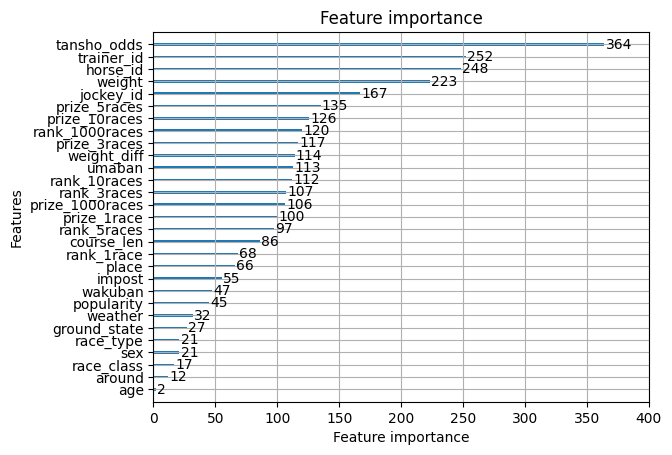

In [15]:
lgb.plot_importance(model)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

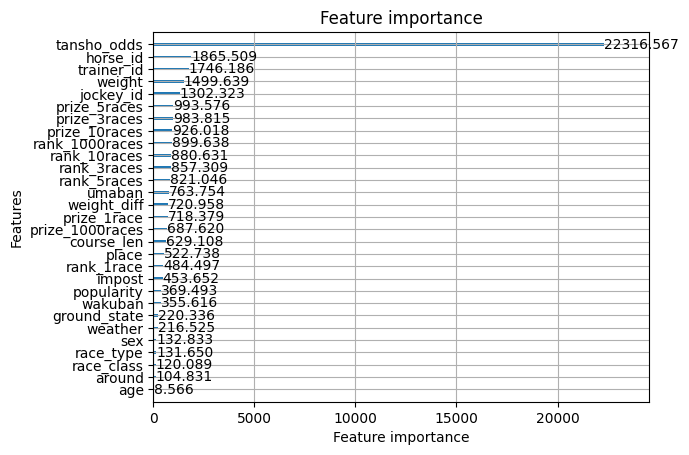

In [16]:
lgb.plot_importance(model,importance_type="gain")

In [39]:
# モデルの保存（動画主はpiccleで保存しているから注意）

model.save_model(Path("..", "model","modelafter20240101.txt"))

In [ ]:
# モデルを呼び出す
# model = lgb.Booster(model_file=Path("..", "model", "model.txt"))

# 予測時の処理
## レース前日準備

In [59]:
import preprocessing

horse_results_preprocessed = preprocessing.process_horse_results(
    save_filename="horse_results_prediction.csv"
)

In [58]:
horse_results_preprocessed[horse_results_preprocessed["rank_diff"].isnull()]

,horse_id,date,rank,prize,rank_diff,weather,race_type,course_len,ground_state,race_class,n_horses
3979,2018105192,2023-04-15,7,0.0,NaN,NaN,1,1400,2,NaN,11
4159,2020110136,2023-02-25,12,0.0,NaN,NaN,0,1600,0,NaN,13
